# House Price Prediction Project
## 1.Introduction
## 2.Exploratory Data Analysis
## 3.Training model
## 4.Conclusion

# -------------------------------------------------------

## Introduction

### 1.Problem
- Predict median house value based on available data

### 2.Dataset

In [105]:
import pandas as pd

In [106]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [107]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [108]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [109]:
# from pycaret.regression import *
# reg = setup(housing,target='median_house_value')
# compare_models(fold=5)

In [110]:
X = housing.drop('median_house_value',axis = 1)
y = housing['median_house_value']

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

ct = ColumnTransformer([
    ('num',num_pipeline,list(X_train.drop('ocean_proximity',axis=1))),
    ('cat',OneHotEncoder(),['ocean_proximity'])
])
X_train = ct.fit_transform(X_train)
X_train

array([[ 1.39954528, -1.23478434, -1.72217905, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.03994105, -0.79066322,  0.02417642, ...,  0.        ,
         0.        ,  0.        ],
       [-1.15264586,  0.784798  ,  0.42107539, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.13094146,  0.26587754, -0.29334276, ...,  0.        ,
         0.        ,  0.        ],
       [-1.25253593,  0.79882288,  0.65921477, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.15980913, -1.32360856, -0.29334276, ...,  0.        ,
         0.        ,  1.        ]])

In [113]:
X_test = ct.transform(X_test)
X_test

array([[ 0.960029  , -0.75326355, -1.16652049, ...,  0.        ,
         0.        ,  0.        ],
       [-0.85297567,  1.07464547,  0.89735415, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63039179, -0.67378924,  0.57983497, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.18371224,  1.54681634, -1.64279926, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83017191, -0.94493687,  0.65921477, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64038079, -0.81403801,  0.02417642, ...,  0.        ,
         0.        ,  0.        ]])

In [116]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1,max_depth=len(X_train[1,:]))
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=13, random_state=1)

In [117]:
y_preds = rf_model.predict(X_test)
y_preds

array([217933.35041195,  75966.76726027, 219152.30480287, ...,
       152505.38974701, 411850.93543259, 205264.12356645])

In [119]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_preds))

0.822275169074156


In [ ]:
df = pd.DataFfram

## Exploratory Data Analysis

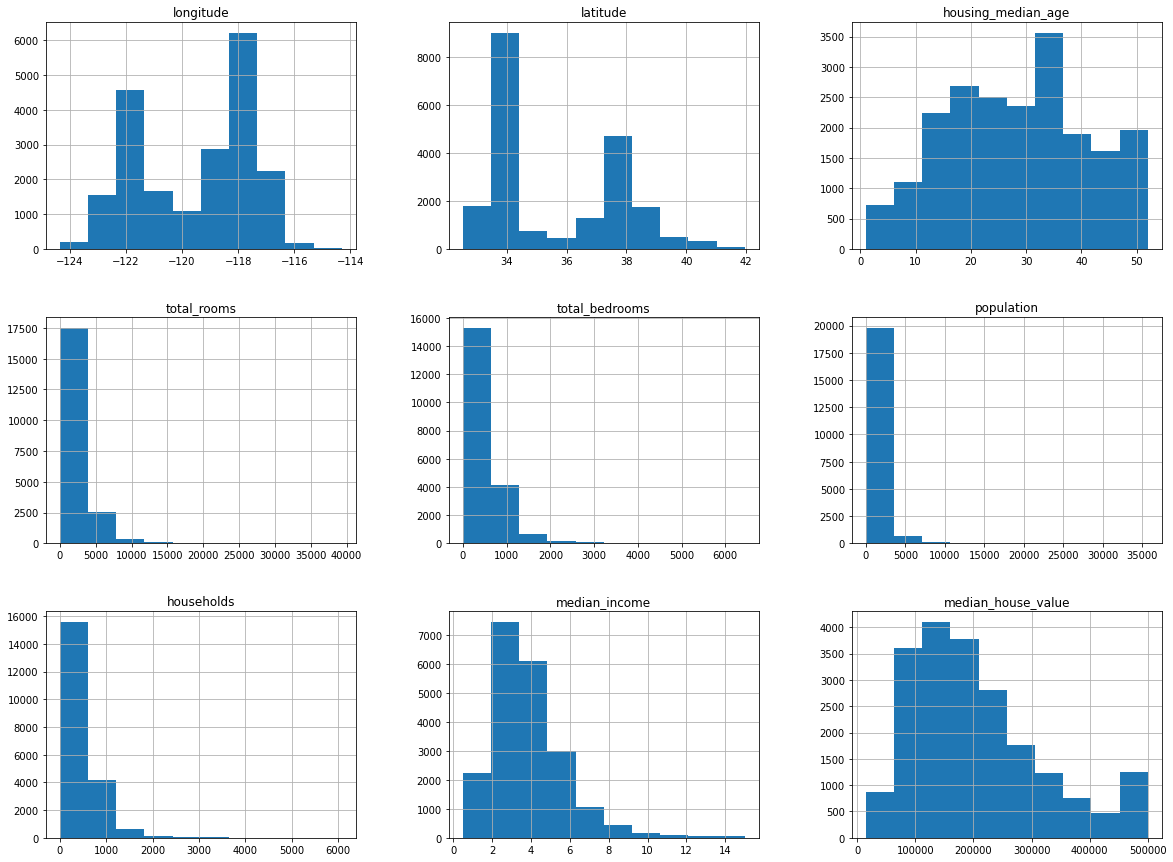

In [6]:
housing.hist(figsize=(20,15));

### Correlations

In [7]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

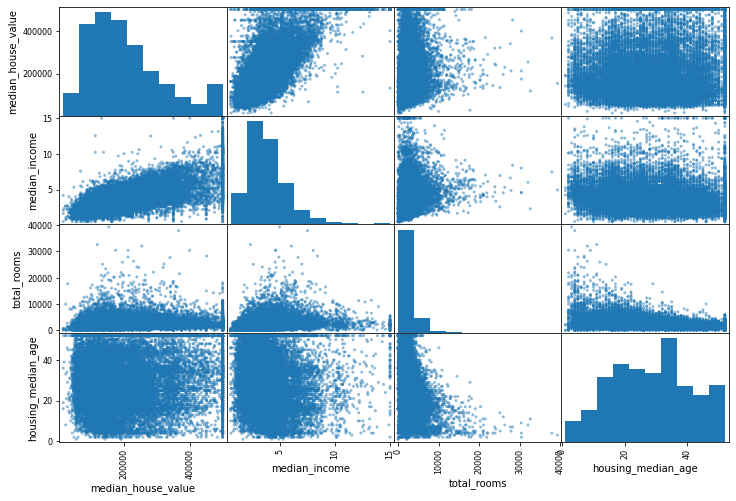

In [8]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8));

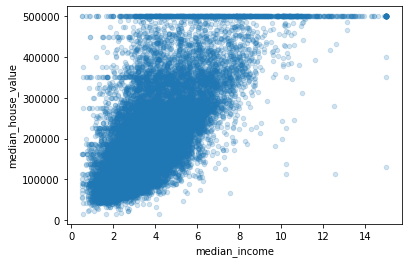

In [9]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.2);

## Training model

<AxesSubplot:>

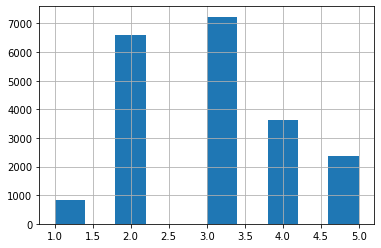

In [10]:
import numpy as np
housing['income_category'] = pd.cut(housing['median_income'],
                                   bins = [0.,1.5,3.0,4.5,6.,np.inf],
                                   labels=[1,2,3,4,5])
housing['income_category'].hist()

### Create a Train/Test set

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size= 0.2, random_state= 1)

for train_index, test_index in split.split(housing,housing['income_category']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
len(strat_train_set),len(strat_test_set)

(16512, 4128)

In [12]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_category',axis=1,inplace = True)
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
740,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
19529,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
8613,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
10142,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
15867,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
11207,-117.92,33.83,52.0,1514.0,301.0,855.0,293.0,3.6042,166400.0,<1H OCEAN
9035,-117.84,34.63,5.0,6739.0,1251.0,4614.0,1266.0,4.0020,115100.0,INLAND
10482,-117.69,33.58,5.0,6678.0,1011.0,2877.0,982.0,7.5177,330000.0,<1H OCEAN
13596,-117.30,34.10,49.0,60.0,11.0,76.0,13.0,2.5625,75000.0,INLAND


### X train , y train

In [13]:
housing = strat_train_set.copy()
housing = housing.drop('median_house_value',axis=1)

In [14]:
housing.shape

(16512, 9)

In [15]:
y_train = strat_train_set['median_house_value'].copy()
y_train.shape

(16512,)

- Transformer

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

ct = ColumnTransformer([
    ('num',num_pipeline,list(housing.drop('ocean_proximity',axis=1))),
    ('cat',OneHotEncoder(),['ocean_proximity'])
])
X_train = ct.fit_transform(housing)
X_train

array([[-1.27826235,  0.95445204,  0.89646428, ...,  0.        ,
         1.        ,  0.        ],
       [-0.70432019,  0.94509343,  0.89646428, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.59827896, -0.82368426, -0.45394013, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.93765346, -0.95938413, -1.88378009, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.13229471, -0.71606022,  1.61138426, ...,  0.        ,
         0.        ,  0.        ],
       [-1.0985935 ,  1.10418984, -1.96321564, ...,  0.        ,
         0.        ,  0.        ]])

### X test , y test 

In [17]:
X_valid= strat_test_set.copy().drop('median_house_value',axis=1)
y_valid = strat_test_set['median_house_value']
X_valid

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
462,-122.27,37.87,35.0,3218.0,1108.0,1675.0,1000.0,1.7464,NEAR BAY
20384,-118.94,34.18,24.0,3689.0,585.0,1898.0,581.0,5.9224,<1H OCEAN
2140,-119.75,36.77,32.0,1962.0,399.0,1005.0,392.0,2.6726,INLAND
8419,-118.34,33.93,32.0,1254.0,399.0,1281.0,386.0,2.2976,<1H OCEAN
2932,-119.00,35.36,35.0,1021.0,280.0,1258.0,239.0,1.7375,INLAND
...,...,...,...,...,...,...,...,...,...
6493,-118.02,34.08,28.0,2769.0,631.0,2452.0,581.0,2.6071,INLAND
6711,-118.16,34.14,41.0,3039.0,482.0,973.0,446.0,7.4817,<1H OCEAN
2389,-119.48,37.00,16.0,2904.0,551.0,1467.0,509.0,3.1736,INLAND
17194,-119.79,34.45,24.0,2746.0,433.0,1076.0,380.0,5.8635,NEAR OCEAN


In [18]:
X_valid = ct.transform(X_valid)

### Training and evaluate on the training set

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1,max_depth=len(X_train[1,:]))
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=13, random_state=1)

In [20]:
re_valids_preds = rf_model.predict(X_valid)
re_valids_preds

array([241512.76939356, 281288.20395413,  76319.17602595, ...,
       107828.55858829, 391700.41994266, 179345.68956211])

In [21]:
from sklearn import metrics
print(metrics.r2_score(y_valid,re_valids_preds))

0.817276939648738


In [22]:
pd.DataFrame({
    'y_test': y_valid,
    'y_pred':re_valids_preds
})

,y_test,y_pred
462,216700.0,241512.769394
20384,239400.0,281288.203954
2140,70400.0,76319.176026
8419,155700.0,166063.410359
2932,48600.0,55998.113667
...,...,...
6493,175900.0,173900.110065
6711,500001.0,434268.154622
2389,111800.0,107828.558588
17194,348700.0,391700.419943


## Conclusion

- Evaluation

- Orientation